In [1]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [2]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## Define Graphing Function

In [42]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2025-01-25']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2025-01-25']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

## Question 1: Use yfinance to Extract Stock Data

Using the `Ticker` module we can create an object that will allow us to access functions to extract data. To do this we need to provide the ticker symbol for the stock, here the company is Apple and the ticker symbol is `AAPL`.

In [4]:
tesla = yf.Ticker("TSLA")

Using the ticker object and the function `history` extract stock information and save it in a dataframe named `tesla_data`. Set the `period` parameter to ` "max" ` so we get information for the maximum amount of time.

In [5]:
tesla_data = tesla.history(period = "max")

**Reset the index** using the `reset_index(inplace=True)` function on the tesla_data DataFrame and display the first five rows of the `tesla_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 1 to the results below.


In [12]:
#tesla_data.reset_index(inplace=True)
tesla_data.tail()

,level_0,index,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
3662,3662,3662,2025-01-17 00:00:00-05:00,421.500000,439.739990,419.750000,426.500000,94991400,0.0,0.0
3663,3663,3663,2025-01-21 00:00:00-05:00,432.640015,433.200012,406.309998,424.070007,87320900,0.0,0.0
3664,3664,3664,2025-01-22 00:00:00-05:00,416.809998,428.000000,414.589996,415.109985,60963300,0.0,0.0
3665,3665,3665,2025-01-23 00:00:00-05:00,416.059998,420.730011,408.950012,412.380005,50690600,0.0,0.0
3666,3666,3666,2025-01-24 00:00:00-05:00,414.450012,418.880005,405.779999,406.579987,56140900,0.0,0.0


## Question 2: Use Webscraping to Extract Tesla Revenue Data

Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm Save the text of the response as a variable named `html_data`.

In [13]:
url = " https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
html_data = requests.get(url).text

Parse the html data using `beautiful_soup` using parser i.e `html5lib` or `html.parser`.

In [14]:
soup = BeautifulSoup(html_data,"html.parser")

In [20]:
# Locate the table
table = soup.find_all("tbody")[1]  # Get the second table body

#  Create an empty DataFrame
tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])

#  Iterate through rows and extract data
rows = []
for row in table.find_all("tr"):
    columns = row.find_all("td")
    if len(columns) > 1:  # Ensure the row has data
        date = columns[0].text.strip()  # Extract and clean the Date
        revenue = columns[1].text.strip()  # Extract and clean the Revenue
        rows.append({"Date": date, "Revenue": revenue})  # Add to a list

#  Convert rows list to DataFrame
tesla_revenue = pd.DataFrame(rows)

tesla_revenue.head()

,Date,Revenue
0,2022-09-30,"$21,454"
1,2022-06-30,"$16,934"
2,2022-03-31,"$18,756"
3,2021-12-31,"$17,719"
4,2021-09-30,"$13,757"


Execute the following line to remove the comma and dollar sign from the `Revenue` column. 

In [22]:
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(r',|\$',"")

Execute the following lines to remove an null or empty strings in the Revenue column.

In [23]:
tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

Display the last 5 row of the `tesla_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [25]:
tesla_revenue.tail()

,Date,Revenue
48,2010-09-30,$31
49,2010-06-30,$28
50,2010-03-31,$21
52,2009-09-30,$46
53,2009-06-30,$27


## Question 3: Use yfinance to Extract Stock Data

Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is GameStop and its ticker symbol is `GME`.

In [27]:
gme = yf.Ticker('GME')

Using the ticker object and the function `history` extract stock information and save it in a dataframe named `gme_data`. Set the `period` parameter to ` "max" ` so we get information for the maximum amount of time.

In [30]:
gme_data = gme.history(period = "max")

**Reset the index** using the `reset_index(inplace=True)` function on the gme_data DataFrame and display the first five rows of the `gme_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 3 to the results below

In [32]:
gme_data.reset_index(inplace=True)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683251,1.687459,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


## Question 4: Use Webscraping to Extract GME Revenue Data

Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html. Save the text of the response as a variable named `html_data_2`.

In [33]:
url2 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
html_data_2 = requests.get(url2).text

Parse the html data using `beautiful_soup` using parser i.e `html5lib` or `html.parser`.

In [34]:
soup2 = BeautifulSoup(html_data_2,"html.parser")

Using `BeautifulSoup` or the `read_html` function extract the table with `GameStop Revenue` and store it into a dataframe named `gme_revenue`. The dataframe should have columns `Date` and `Revenue`. Make sure the comma and dollar sign is removed from the `Revenue` column.

In [37]:
table = soup2.find_all("tbody")[1]  # Assuming the table is at index 1

# Create an empty DataFrame
gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])

# Extract data row by row
rows = []
for row in table.find_all("tr"):
    columns = row.find_all("td")
    if len(columns) > 1:  # Ensure the row has data
        date = columns[0].text.strip()  # Clean the Date
        revenue = columns[1].text.strip()  # Clean the Revenue
        rows.append({"Date": date, "Revenue": revenue})  # Append as a dictionary

#  Create the DataFrame
gme_revenue = pd.DataFrame(rows)

# Clean the Revenue column (remove dollar signs and commas)
gme_revenue["Revenue"] = gme_revenue["Revenue"].str.replace(r"[,|\$]", "", regex=True)



In [38]:
gme_revenue.tail()

,Date,Revenue
57,2006-01-31,1667
58,2005-10-31,534
59,2005-07-31,416
60,2005-04-30,475
61,2005-01-31,709


## Question 5: Plot Tesla Stock Graph

In [40]:
# Remove commas and dollar signs, then convert to numeric
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].str.replace(r"[,|\$]", "", regex=True)
tesla_revenue["Revenue"] = pd.to_numeric(tesla_revenue["Revenue"], errors="coerce")

C:\Users\mriaz\AppData\Local\Temp\ipykernel_9036\3812334627.py:5: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.

C:\Users\mriaz\AppData\Local\Temp\ipykernel_9036\3812334627.py:6: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.



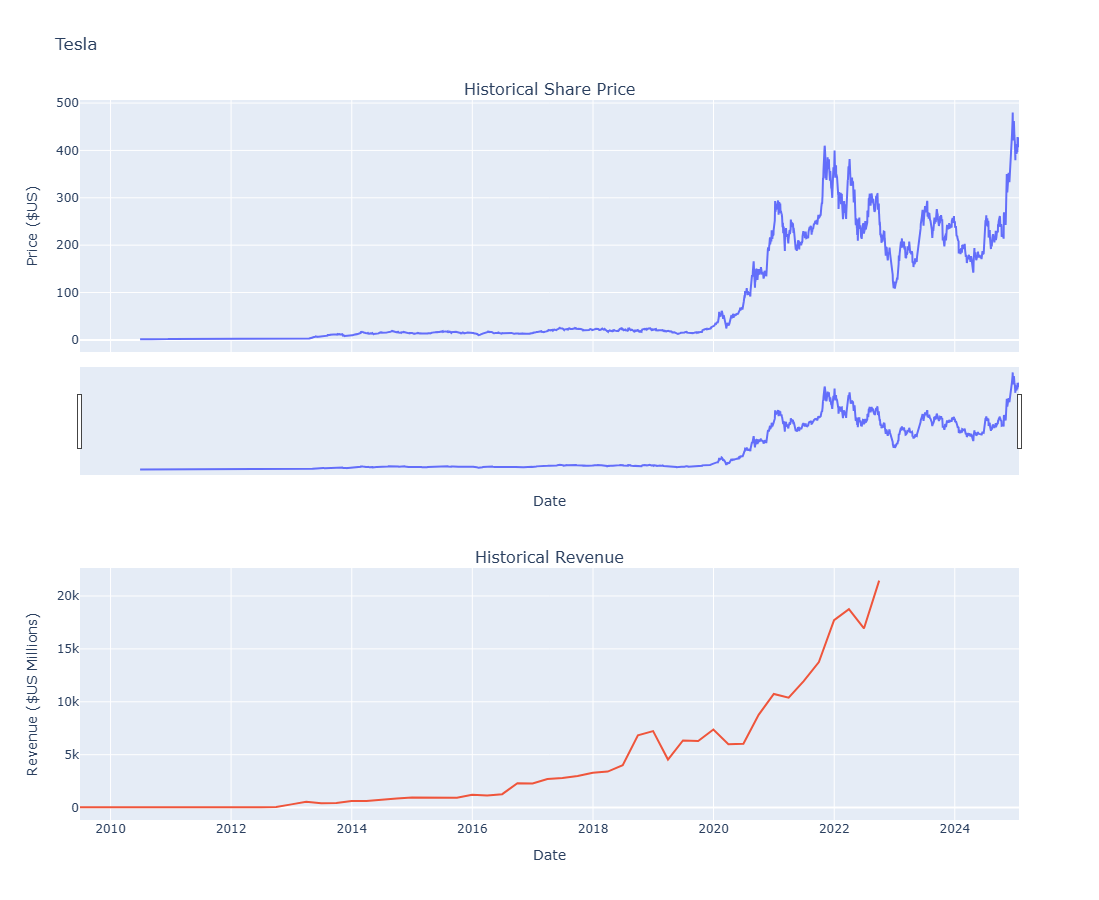

In [43]:
make_graph(tesla_data, tesla_revenue, 'Tesla')

## Question 6: Plot GameStop Stock Graph

C:\Users\mriaz\AppData\Local\Temp\ipykernel_9036\3812334627.py:5: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.

C:\Users\mriaz\AppData\Local\Temp\ipykernel_9036\3812334627.py:6: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.



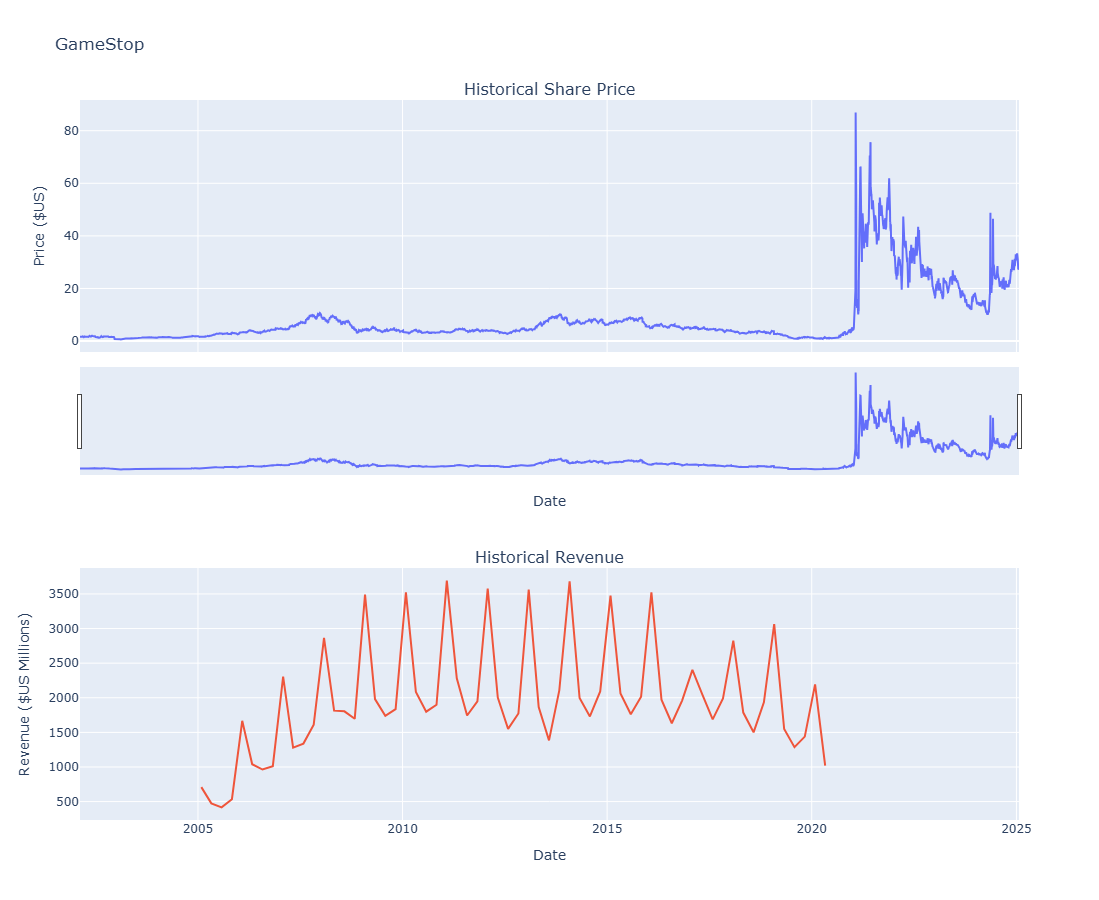

In [44]:
make_graph(gme_data, gme_revenue, 'GameStop')